# Exercício 1
## Desenvolva um programa que:

(a) Carregue uma imagem em escala de cinza usando matplotlib.pyplot.imread() ou PIL.Image.open().
<br>
(b) Converta para escala de cinza se necessário.
<br>
(c) Exiba informações sobre a imagem:
<br>
    - Dimensões (altura × largura)
    <br>
    - Tipo de dados (dtype)
    <br>
    - Valores mínimo e máximo dos pixels
    <br>
    - Posto da matriz da imagem
<br>
(d) Plote a imagem original usando plt.imshow().

In [90]:
import matplotlib.pyplot as plt
import numpy as np

In [91]:
#a)
original = plt.imread("gato.webp")
img = plt.imread("gato.webp")
img = np.float64(img)
img

array([[[100., 100., 100.,   0.],
        [100., 100., 100.,   0.],
        [100., 100., 102.,   0.],
        ...,
        [102., 102., 102.,   0.],
        [102., 102., 102.,   0.],
        [102., 102., 102.,   0.]],

       [[100., 100., 100.,   0.],
        [100., 100., 100.,   0.],
        [100., 100., 102.,   0.],
        ...,
        [102., 102., 102.,   0.],
        [102., 102., 102.,   0.],
        [102., 102., 102.,   0.]],

       [[100., 101.,  98.,   0.],
        [100., 100., 100.,   0.],
        [100., 100., 100.,   0.],
        ...,
        [102., 102., 104.,   0.],
        [102., 102., 104.,   0.],
        [102., 102., 104.,   0.]],

       ...,

       [[165., 165., 167.,   0.],
        [165., 165., 167.,   0.],
        [167., 165., 165.,   0.],
        ...,
        [207., 204., 205.,   0.],
        [207., 204., 205.,   0.],
        [207., 204., 205.,   0.]],

       [[164., 166., 167.,   0.],
        [165., 165., 167.,   0.],
        [167., 165., 165.,   0.],
        .

In [92]:
#b)
img = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]
img

array([[100.    , 100.    , 100.1444, ..., 102.    , 102.    , 102.    ],
       [100.    , 100.    , 100.1444, ..., 102.    , 102.    , 102.    ],
       [100.5708, 100.    , 100.    , ..., 102.1444, 102.1444, 102.1444],
       ...,
       [165.1444, 165.1444, 165.4252, ..., 204.71  , 204.71  , 204.71  ],
       [165.647 , 165.1444, 165.4252, ..., 205.    , 205.    , 205.    ],
       [165.647 , 165.1444, 165.4252, ..., 205.    , 205.    , 205.    ]],
      shape=(512, 512))

In [93]:
#c)
print("Altura: ", img.shape[0])
print("Largura: ", img.shape[1])
print("Tipo: ", img.dtype)
print("Minimo: ", img.min())
print("Minimo: ", img.max())
print("Posto: ", np.linalg.matrix_rank(img))

Altura:  512
Largura:  512
Tipo:  float64
Minimo:  0.0
Minimo:  254.20579999999998
Posto:  512


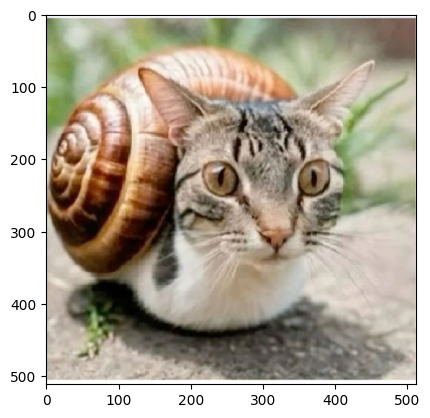

In [94]:
plt.imshow(original)

# Exercício 2

## Crie uma função `aproximacao_posto_r(imagem, r)` que:


a)  Calcule a decomposição SVD da imagem.
<br>
b)  Construa a aproximação de posto $r$ usando apenas os primeiros $r$ valores singulares.
<br>
c)  Calcule o erro de Frobenius de duas formas:
<br>
    * **Método direto:** $\|A - A_r\|_F$ (norma da diferença das matrizes)
<br>
    * **Método teórico:** $\sqrt{\sigma_{r+1}^2 + \sigma_{r+2}^2 + \cdots + \sigma_n^2}$ (usando os valores singulares)
<br>
d)  Verifique se os dois métodos produzem o mesmo resultado.
<br>
e)  Retorne a imagem aproximada e o erro calculado.<br>

In [95]:
def aproximacao_posto_r(imagem, r):
    #a)
    U, S, Vt = np.linalg.svd(imagem, full_matrices=True)

    #b)
    U_reconstruido = U[:, :r]
    S_reconstruido = S[:r]
    Vt_reconstruido = Vt[:r, :]

    img_reconstruida = U_reconstruido @ np.diag(S_reconstruido) @ Vt_reconstruido

    #c)
    erro_F1 = np.linalg.norm(img - img_reconstruida)
    erro_F2 = 0
    for i in S[r:]:
        erro_F2 += i ** 2
    erro_F2 = np.sqrt(erro_F2)

    #d)
    if np.isclose(erro_F1, erro_F2):
        print("Erros iguais")
    else:
        print("Erros deferentes")

    #e)
    return img_reconstruida, erro_F1


In [96]:
teste = [1, 5, 10, 20, 50, 100]
for i in teste:
    _, erro = aproximacao_posto_r(img, i)
    print("erro: ", erro)

Erros iguais
erro:  24140.45632452238
Erros iguais
erro:  13923.152330610557
Erros iguais
erro:  9789.621835525713
Erros iguais
erro:  6331.49293738414
Erros iguais
erro:  2465.0385014028816
Erros iguais
erro:  767.9123931064498


# Exercicio 3

### Desenvolva um programa que:


a)  Carregue uma imagem de sua escolha (preferencialmente em escala de cinza para simplificar).
<br>
b)  Calcule aproximações de posto $r$ para $r = [1, 5, 10, 25, 50, 100]$.
<br>
c)  Crie um subplot com $2 \times 3$ imagens mostrando:
<br>
    * A imagem original no primeiro subplot.
<br>
    * As 5 aproximações nos demais subplots.
<br>
d)  Para cada aproximação, inclua no título:
<br>
    * O valor de $r$.
<br>
    * O erro de reconstrução (Erro de Frobenius).
<br>
    * A porcentagem de compressão, calculada por:
<br>
        $$\left(1 - \frac{r(m+n+1)}{mn}\right) \times 100$$
<br>
        (Onde $m$ e $n$ são as dimensões da imagem).
<br>
e)  Salve a figura como `comparacao_aproximacoes.png`.
<br>

Erros iguais
Erros iguais
Erros iguais
Erros iguais
Erros iguais
Erros iguais


Text(0.5, 1.0, 'r = 100, erro = 767.91, compressao = -513.0')

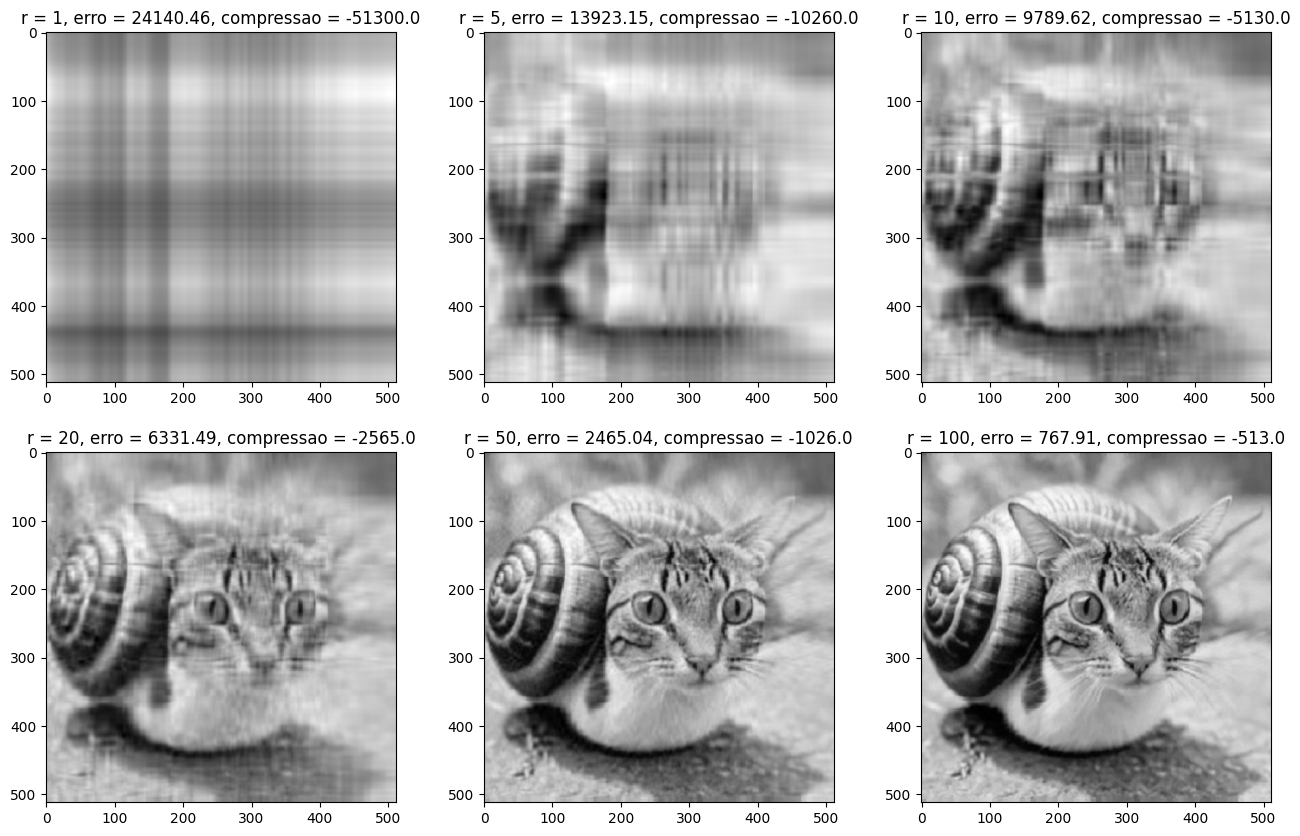

In [100]:
#a)
#imagem ja carregada

#b)
img1, erro1 = aproximacao_posto_r(img, 1)
img2, erro2 = aproximacao_posto_r(img, 5)
img3, erro3 = aproximacao_posto_r(img, 10)
img4, erro4 = aproximacao_posto_r(img, 20)
img5, erro5 = aproximacao_posto_r(img, 50)
img6, erro6 = aproximacao_posto_r(img, 100)

#c)
def compressao(m, n, r):
    return (1 - (r * (m + n + 1)) / (m * n)) * 100

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes[0, 0].imshow(img1, cmap='gray')
axes[0, 0].set_title(f"r = {1}, erro = {erro1:.2f}, compressao = {compressao(1, img1.shape[0], img.shape[1])}")
axes[0, 1].imshow(img2, cmap='gray')
axes[0, 1].set_title(f"r = {5}, erro = {erro2:.2f}, compressao = {compressao(5, img2.shape[0], img.shape[1])}")
axes[0, 2].imshow(img3, cmap='gray')
axes[0, 2].set_title(f"r = {10}, erro = {erro3:.2f}, compressao = {compressao(10, img3.shape[0], img.shape[1])}")
axes[1, 0].imshow(img4, cmap='gray')
axes[1, 0].set_title(f"r = {20}, erro = {erro4:.2f}, compressao = {compressao(20, img4.shape[0], img.shape[1])}")
axes[1, 1].imshow(img5, cmap='gray')
axes[1, 1].set_title(f"r = {50}, erro = {erro5:.2f}, compressao = {compressao(50, img5.shape[0], img.shape[1])}")
axes[1, 2].imshow(img6, cmap='gray')
axes[1, 2].set_title(f"r = {100}, erro = {erro6:.2f}, compressao = {compressao(100, img6.shape[0], img.shape[1])}")